In [1]:
import os
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import cv2
import tifffile as tiff

In [2]:
os.rename("dataset/train/2", "dataset/train/6")

(14830, 9506) 140973980


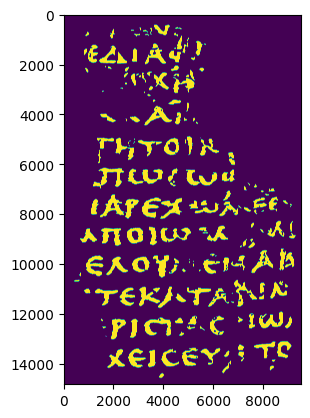

In [3]:
frag2 = np.array(Image.open("dataset/train/6/inklabels.png"))
print(frag2.shape, frag2.shape[0]*frag2.shape[1])
plt.imshow(frag2)

In [4]:
line1, line2 = frag2.shape[0]//3, 2*frag2.shape[0]//3
line1, line2

(4943, 9886)

In [5]:
suffix = os.path.splitext("dataset/train/6/inklabels.tif")[-1]
f"{'surface_volume/' if suffix == '.tif' else ''}{os.path.basename('dataset/train/6/inklabels.tif')}"

'surface_volume/inklabels.tif'

In [6]:
NEW_FRAG = [2, 4, 5]
OUT_DIR = "dataset/train"
INPUT_DIR = "dataset/train/6"
ORI_SIZE = frag2.shape
SPLIT_LINES = (frag2.shape[0]//3, 2*frag2.shape[0]//3)
TARGET = ["surface_volume", "inklabels.png", "mask.png"]

In [7]:
for new_frag in NEW_FRAG:
    os.makedirs(f"{OUT_DIR}/{new_frag}/surface_volume", exist_ok=True)

In [8]:
def split_and_save(img_path):
    # --split--
    img_name = os.path.basename(img_path)
    suffix = os.path.splitext(img_path)[-1]

#     img = np.array(Image.open(img_path))
    # img = cv2.imread(img_path, -1 if suffix=='.tif' else 0)
    # print(img.shape)
    # if suffix == ".tif":
    #     img = img.astype(np.float32) / 65535.0
    #     img_name = img_name.replace(".tif", ".png")
    if suffix == ".tif":
        img = tiff.imread(img_path)
    else:
        img = cv2.imread(img_path, 0)
    # print(img.shape, img.max(), img.dtype)

    out_imgs = {}
    out_imgs[str(NEW_FRAG[0])] = img[:SPLIT_LINES[0], :]
    out_imgs[str(NEW_FRAG[1])] = img[SPLIT_LINES[0]:SPLIT_LINES[1], :]
    out_imgs[str(NEW_FRAG[2])] = img[SPLIT_LINES[1]:, :]

    # --save--
    for new_frag in NEW_FRAG:
        # cv2.imwrite(
        #     os.path.join(f"{OUT_DIR}/{new_frag}", f"{'surface_volume/' if suffix == '.tif' else ''}{img_name}"),
        #     out_imgs[str(new_frag)]# * 255).astype(np.uint8)
        # )
        if suffix == '.tif':
            tiff.imwrite(
                f"{OUT_DIR}/{new_frag}/surface_volume/{img_name}",
                out_imgs[str(new_frag)]
            )
            # tiff.imsave()
        else:
            cv2.imwrite(
                f"{OUT_DIR}/{new_frag}/{img_name}",
                # (out_imgs[str(new_frag)] / 255).astype(np.uint8)
                out_imgs[str(new_frag)]
            )

In [9]:
for new_frag in NEW_FRAG:
    os.makedirs(f"{OUT_DIR}/{new_frag}/surface_volume", exist_ok=True)
for tg in TARGET:
    tg_path = os.path.join(INPUT_DIR, tg)
    if os.path.isdir(tg_path):
        print("processing surface volume...")
        vol_list = os.listdir(tg_path)
        for vol in tqdm(vol_list, desc=f"Spliting images", dynamic_ncols=True):
            vol_path = os.path.join(tg_path, vol)
            split_and_save(vol_path)
    else:
        print("processing masks...")
        split_and_save(tg_path)
print("done processing")

processing surface volume...


Spliting images:   0%|          | 0/65 [00:00<?, ?it/s]

processing masks...
processing masks...
done processing


frag2: ink_size (4943, 9506), num_pixels 46988158
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]] uint8 255 (4943, 9506)
[[32440 32078 33079 34785 35955]
 [30554 30798 32253 33969 35107]
 [32751 33973 35778 37140 37530]
 [36949 37953 38975 39664 39730]
 [39448 41488 42504 42370 41419]] uint16 65535 (4943, 9506)
frag4: ink_size (4943, 9506), num_pixels 46988158
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]] uint8 255 (4943, 9506)
[[24456 28780 32237 32658 27431]
 [25493 30001 33225 30213 28608]
 [25080 29234 32061 30298 28180]
 [26641 30055 32077 31026 28514]
 [31997 32681 30677 27660 24919]] uint16 65535 (4943, 9506)
frag5: ink_size (4944, 9506), num_pixels 46997664
[[255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]] uint8 255 (4944, 9506)
[[35616 33633 30924 29388 29832]
 [34420 31929 29300 28896 28559]
 [27262 26792 25989 26023 26605]
 [23656 23059 23044 23415 24293]
 [21452 21468 224

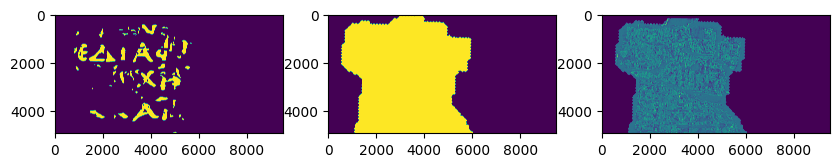

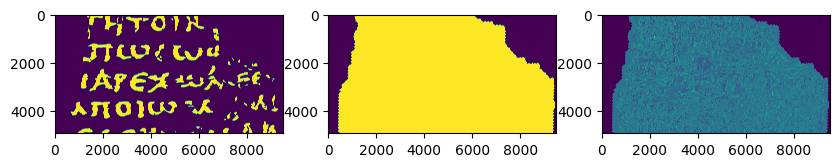

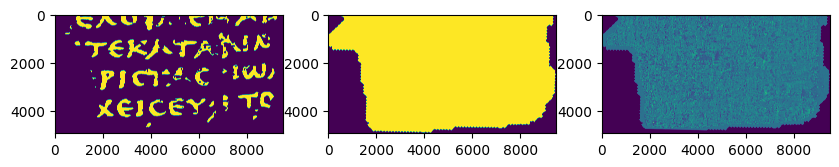

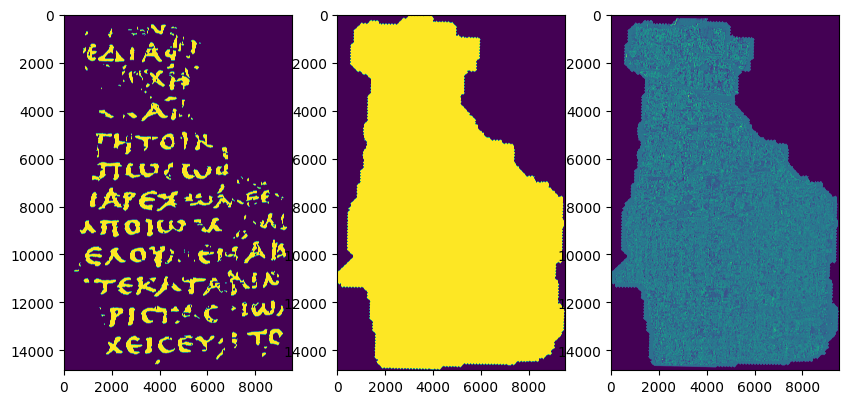

In [10]:
for new_frag in NEW_FRAG+[6, 1, 3]:
    # inklabels = np.array(Image.open(f"dataset/train/{new_frag}/inklabels.png"))
    inklabels = cv2.imread(f"dataset/train/{new_frag}/inklabels.png", 0)
    print(f"frag{new_frag}: ink_size {inklabels.shape}, num_pixels {inklabels.shape[0]*inklabels.shape[1]}")
    if new_frag in [2, 4, 5, 6]:
        mask = np.array(Image.open(f"dataset/train/{new_frag}/mask.png"))
        # if new_frag == 6:
        # frag = np.array(Image.open(f"dataset/train/{new_frag}/surface_volume/00.tif"))
        frag = cv2.imread(f"dataset/train/{new_frag}/surface_volume/00.tif", -1)
        # print(frag)
        # else:
        #     frag = np.array(Image.open(f"dataset/train/{new_frag}/surface_volume/00.png"))
        print(inklabels[inklabels.shape[0]//2:inklabels.shape[0]//2+5, inklabels.shape[1]//2:inklabels.shape[1]//2+5], inklabels.dtype, inklabels.max(), inklabels.shape)
        print(frag[frag.shape[0]//2:frag.shape[0]//2+5, frag.shape[1]//2:frag.shape[1]//2+5], frag.dtype, frag.max(), frag.shape)
        fig, axes = plt.subplots(1, 3, figsize=(10, 10))
        axes[0].imshow(inklabels)
        axes[1].imshow(mask)
        axes[2].imshow(frag)